# Announcement
1. HW1 is released and due in two weeks before the lecture. (due before the class)
* Please use your time wisely! Don't email asking for late days (everyone gets 2 late days with no penalty).  Additional late days will not be permitted unless there's an unexpected circumstance. Note: academic curriculum-related reasons are not considered unexpected.

# CME 193 - Lecture 4


Today, we'll cover some more features of numpy.

- Random numbers and histograms
- Linear Algebra Method walkthrough
- PCA Implementation


Preview:
1. Exploring list of numpy.random function including:
* `rng.rand(d0,d1,...,dn)`, Random values in a given shape
* `rng.randn(d0, d1, ...,dn)`, Random standard normal
* `rng.randint(lo, hi, size)`, Random integers `[lo, hi)`
* `rng.choice(a, size, repl, p)`, Sample from a
1. Review `matplotlib.pyplot`, and try to make a histogram plot using `plt.hist`
2. If you were not familar with Linear Algebra concept such as dot product, eigen decomposition, and PCA, I highly recommend studying them using some visual aids resource like `3Blue1Brown` or 'StatQuest', which are youtube channels that explains math&stats concept using extremely helpful visualizations.  
[Dot Product](https://www.youtube.com/watch?v=LyGKycYT2v0&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=10)  
[Eigen Decomposition](https://www.youtube.com/watch?v=PFDu9oVAE-g&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=15)  
[PCA main idea](https://www.youtube.com/watch?v=HMOI_lkzW08)  
[PCA step by step](https://www.youtube.com/watch?v=FgakZw6K1QQ)


HINT: use `?` to check the documentation of the function

# Basic Section (Start)


## Random numbers

We'll start with
```python
import numpy as np
import numpy.random as rng
```
`numpy` is the *package*.  `random` is a *module* in the package.

In [ ]:
import numpy as np
import numpy.random as rng  #random number generator

You can find a full list of functions in [the documentation](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html)

* `rng.rand(d0,d1,...,dn)`, Random values in a given shape
* `rng.randn(d0, d1, ...,dn)`, Random standard normal
* `rng.randint(lo, hi, size)`, Random integers `[lo, hi)`
* `rng.choice(a, size, replace, p)`, Sample from a
* `rng.shuffle(a)`, Permutation (in-place)
* `rng.permutation(a)`, Permutation (new array)
* Also, have parameterized distributions: `beta`, `binomial`, `chisquare`, `exponential`, `dirichlet`, `gamma`, `laplace`, `lognormal`, `pareto`, `poisson`, `power`...

In [ ]:
rng.randint(-10,10,20) #start(inclusive), end(exclusive), size of array

In [ ]:
rng.normal(5,3,10)

In [ ]:
rng.normal?

### Histograms

In [ ]:
x1 = rng.normal(5,3,1000)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(4,3))
plt.hist(x1)

plt.show()

In [ ]:
plt.hist?

In [ ]:
plt.figure(figsize=(4,3))
plt.hist(x1, bins = 100)

plt.show()

In [ ]:
x2 = rng.normal(1,1,1000)

In [ ]:
#plot1
plt.figure(figsize=(4,3))

b = plt.hist(x1,histtype='step')
a = plt.hist(x2,histtype='bar')

plt.show()

#plot 2
plt.figure(figsize = (1,1))
plt.plot(np.arange(4),np.arange(4))
plt.show()

In [ ]:
plt.figure(figsize=(4,3))

plt.hist2d(x1,x2)

plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()

plt.show()

#bucketized the 2d space into blocks
# and you count the number of occurance in that block

# Basic Section (End)

# Linear Algebra in NumPy

In [ ]:
import numpy.linalg as la

See [the documentation](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.linalg.html) for more.

* `la.qr`, Computes the QR decomposition
* `la.cholesky`, Computes the Cholesky decomposition
* `la.inv(A)`, Inverse
* `la.solve(A,b)`, Solves $Ax = b$ for $A$ full rank
* `la.lstsq(A,b)`, Solves $\arg\min_x \|Ax-b\|_2$
* `la.eig(A)`, Eigenvalue decomposition
* `la.eigh(A)`, Eigenvalue decomposition for
symmetric or hermitian
* `la.eigvals(A)`, Computes eigenvalues.
* `la.svd(A, full)`, Singular value decomposition
* `la.pinv(A)`, Computes pseudo-inverse of A

### la.svd

In [ ]:
la.svd?
# svd(A) = U@np.diag(S)@V.T

In [ ]:
# example of SVD
A = np.random.normal(0, 1, (3,3))
A

In [ ]:
U, S, Vt = la.svd(A)
print("A  = \n", A)
print("U = \n", U)
print("S = \n", np.diag(S))
print("V = \n", Vt.T)

<div>
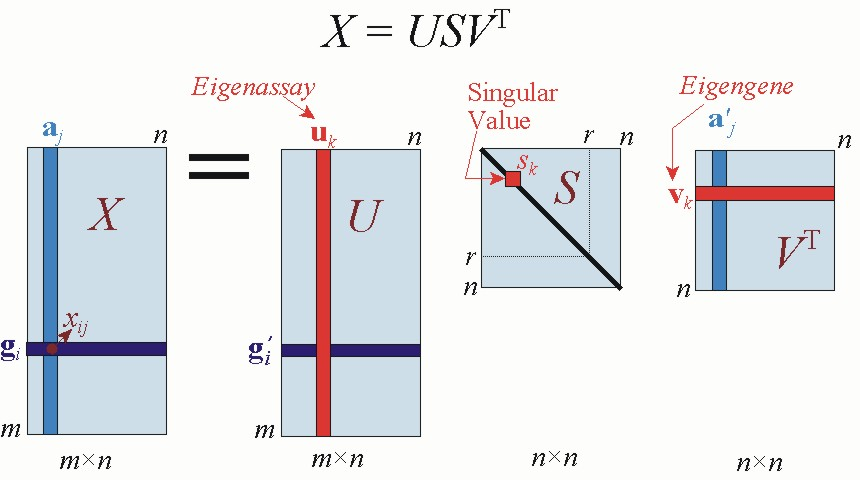
</div>


U and V are orthogonal matrices (columns are orthonormal) ((technically, unitary as it can be complex-valued if A is))
- the column value is ranked heriatically from most important to less important, in scale of how much variance it describes from original matrix  

S is a diagnal matrix:  
- non-negative, descrasing mangnitude -> relative importance of U and V columns
  

In [ ]:
U@U.T
#Rounded Error: float point error double precions -> 10^16

In [ ]:
A

In [ ]:
U@np.diag(S)@Vt

### la.solve

To solve a matrix equation: Ax = b
Using the `solve` function (uses LAPACK's general solve, which is probably LU-decomposition)

In [ ]:
?la.solve

In [ ]:
#find x that gives A@x = b 
A = np.arange(0, 4, 1.0).reshape(2,2)
b = A@np.array([1.0,2.0])
print("A = \n",A)
print("b = \n", b)

In [ ]:
?la.solve

In [ ]:
x = la.solve(A,b)
print("x = \n", x)

In [ ]:
A@x

# Exercise (In-lecture)

Generate a 100 by 10 matrix `A = np.random.randn(100,10)` and a vector `b = np.random.rand(100)`. Implement the [Richardson iteration](https://en.wikipedia.org/wiki/Modified_Richardson_iteration) to solve the least-squares problem `|A@x-b|_2^2`. Some pseudocode for this is below:
HINT: `la.norm` would be helpful
```
    input) A: an m x n matrix, b: a m x 1 vector
    outputs) x: n x 1 vector minimizing |A@x-b|_2^2.

    x <- all-zeros vector
    steplength = 0.01

    residual = b - A@x
    while x has not converged(threshold = 0.00001):  
      x = x + steplength*(A.T@residual)
      update residual
```

Compare your solution to numpy's built-in `lstsq` function.

In [ ]:
# YOUR CODE HERE

In [ ]:
?la.lstsq

In [ ]:
x,_,_,_ = la.lstsq(A,b, rcond=None)
x

## Power method (In-lecture)

$$ A v = \lambda v$$

with matrix A, vector v, and scalar $\lambda$. Here $v$ is known as an eigenvector and $\lambda$ is its corresponding eigenvalue. 

Power method is an algorithm for finding the largest eigenpair of a matrix.  We'll assume that we're working with symmetric/Hermitian matrices for simplicity (i.e. $A^T = A$).  Recall the largest eigenvector of a matrix $A$ solves the variational problem:
$$\max_{\|v\|_2 = 1} v^T A v$$
The eigenvalue is the value $\lambda = v^T A v$.
* generate a random symmetric matrix (however you like).
* Find the largest eigenpair using the power method
* Compare the answer with what you would get from numpy.linalg.eigh

The power method uses iterated matrix-vector multiplication to find the largest magnitude eigenvalue of $A$.  
HINT: `la.norm` would be helpful
```
    input) A: an n x n symmetric matrix
    outputs) l: the eigenvalue with the largest absolute value
             v: the corresponding eigenvector

    v <- random vector of length n
    while l has not converged(thershold = 1e-5):
        v <- A v
        v <- v / ||v||_2
        l <- v.T@A@v
```

turn the above pseudo-code into a python function that implements power method. How does the result compare to `eigh`?

In [ ]:
# YOUR CODE HERE

In [ ]:
# w is the weight
# v is the collection of eigenvectors
w_eigh, v_eigh = la.eigh(A)

(w_eigh[-1],v_eigh[:, -1])

In [ ]:
A = rng.rand(4,4)
v = rng.rand(4)

We now have the groundwork that we will build on in the rest of the class. We'll conclude class with a demonstration of the power of numpy and scipy as a taster for the rest of the class.

## PCA with numpy

[Principal Component Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis) is a very common tool in data science to extract the most relevant features of a dataset. We can implement this in numpy very easily via the SVD. (This demo is taken from the numpy documentation [here](https://numpy.org/doc/1.19/user/tutorial-svd.html)).

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from scipy import misc
img_gray = misc.face(gray=True)/255

In [ ]:
plt.figure(figsize = (3,3))
plt.imshow(img_gray,cmap="gray")
plt.show()

In [ ]:
img_gray.shape

Consider the image above (actually a numpy array). We will attempt to 'compress' it via the SVD.

In [ ]:
U, s, Vt = la.svd(img_gray)
S = np.diag(s)
plt.plot(s)

In [ ]:
plt.plot(s)
plt.xlim([0,30])

The singular values of a matrix represent how 'important' a certain set of vectors is to forming the full matrix. We see here that only a very small number of vectors have large singular value.

In [ ]:
k = 20
compressed = U[:,:k] @ S[:k,:k] @ Vt[:k,:] #(768,20) (20,20) (20, 1024)
print(compressed.shape)

In [ ]:
plt.figure(figsize = (4,4))
plt.imshow(compressed, cmap="gray")
plt.show()

In [ ]:
print(img_gray.shape)
plt.figure(figsize = (4,4))
plt.imshow(img_gray,cmap="gray")
plt.show()

In [ ]:
import sys
# U @ S @ Vt
sys.getsizeof(Vt)

In [ ]:
# U[:,:k] @ S[:k,:k] @ Vt[:k,:]
sys.getsizeof(Vt[:k,:])

In [ ]:
8388736/128

As we see, with only 20 vectors we are able to construct a (very blurry) representation of the image. In general, singular value decomposition can be very helpful for extracting generalities of a dataset.